In [1]:
#CLUSTERING ALGORITHM

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
iris_data = load_iris()

In [5]:
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# Create a DataFrame
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

# Add the target variable 'species' to the DataFrame
df['class'] = iris_data.target

# Display the DataFrame
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [11]:
df.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

In [13]:
df.notnull().sum()

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
class                150
dtype: int64

In [14]:
df.duplicated().sum()

1

In [17]:
df.shape

(150, 5)

In [18]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

In [19]:
df=df.drop_duplicates()
df=df.reset_index(drop=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


In [20]:
df['class'].unique()

array([0, 1, 2])

In [21]:
df.groupby('class').size()

class
0    50
1    50
2    49
dtype: int64

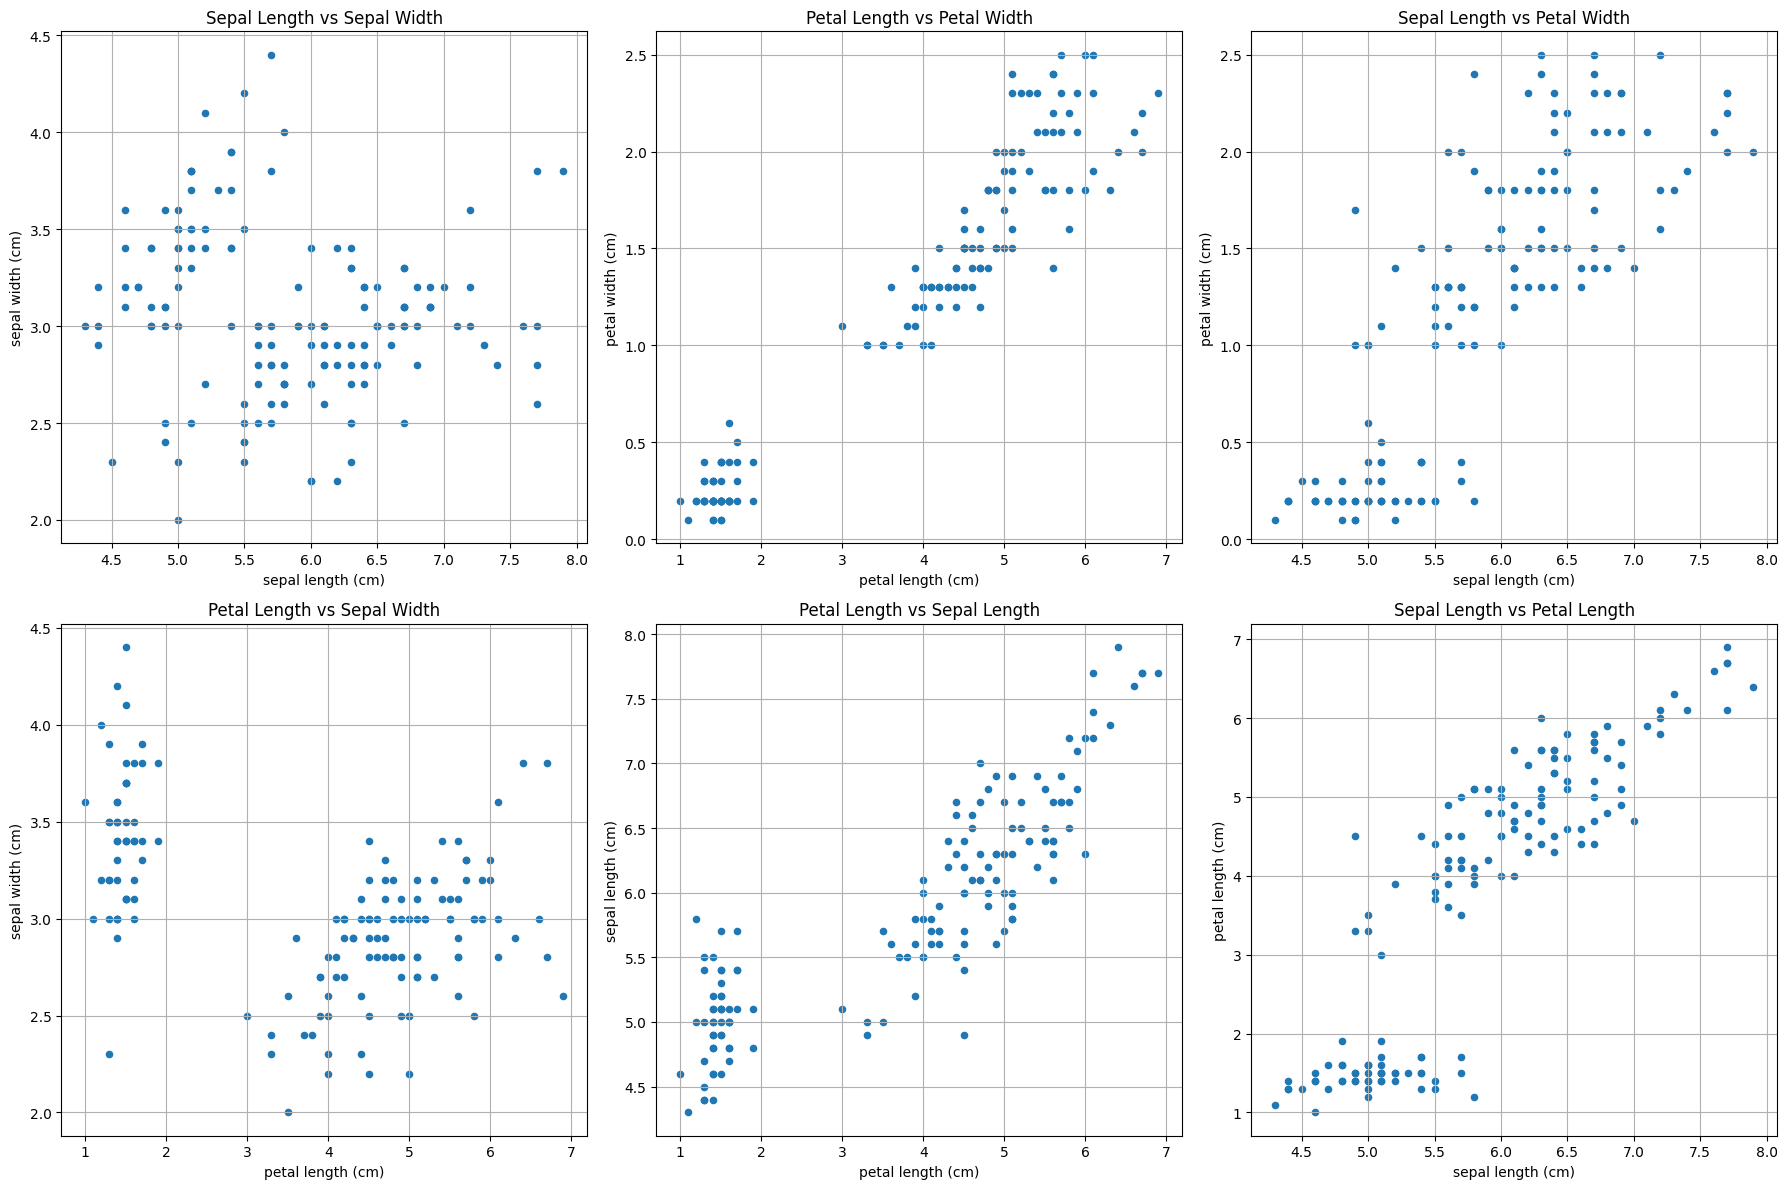

In [22]:
# Create a figure and a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Plot 1: Sepal length vs. Sepal width
df.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', ax=axes[0, 0])
axes[0, 0].set_title('Sepal Length vs Sepal Width')
axes[0, 0].grid()

# Plot 2: Petal length vs. Petal width
df.plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', ax=axes[0, 1])
axes[0, 1].set_title('Petal Length vs Petal Width')
axes[0, 1].grid()

# Plot 3: Sepal length vs. Petal width
df.plot(kind='scatter', x='sepal length (cm)', y='petal width (cm)', ax=axes[0, 2])
axes[0, 2].set_title('Sepal Length vs Petal Width')
axes[0, 2].grid()

# Plot 4: Petal length vs. Sepal width
df.plot(kind='scatter', x='petal length (cm)', y='sepal width (cm)', ax=axes[1, 0])
axes[1, 0].set_title('Petal Length vs Sepal Width')
axes[1, 0].grid()

# Plot 5: Petal length vs. Sepal length
df.plot(kind='scatter', x='petal length (cm)', y='sepal length (cm)', ax=axes[1, 1])
axes[1, 1].set_title('Petal Length vs Sepal Length')
axes[1, 1].grid()

# Plot 6: Sepal length vs. Petal length
df.plot(kind='scatter', x='sepal length (cm)', y='petal length (cm)', ax=axes[1, 2])
axes[1, 2].set_title('Sepal Length vs Petal Length')
axes[1, 2].grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

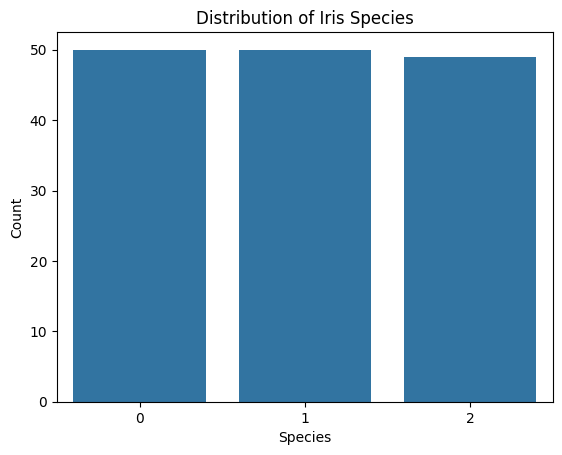

In [23]:
# Create a count plot for the target column 'class'
sns.countplot(x='class', data=df)
plt.title('Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

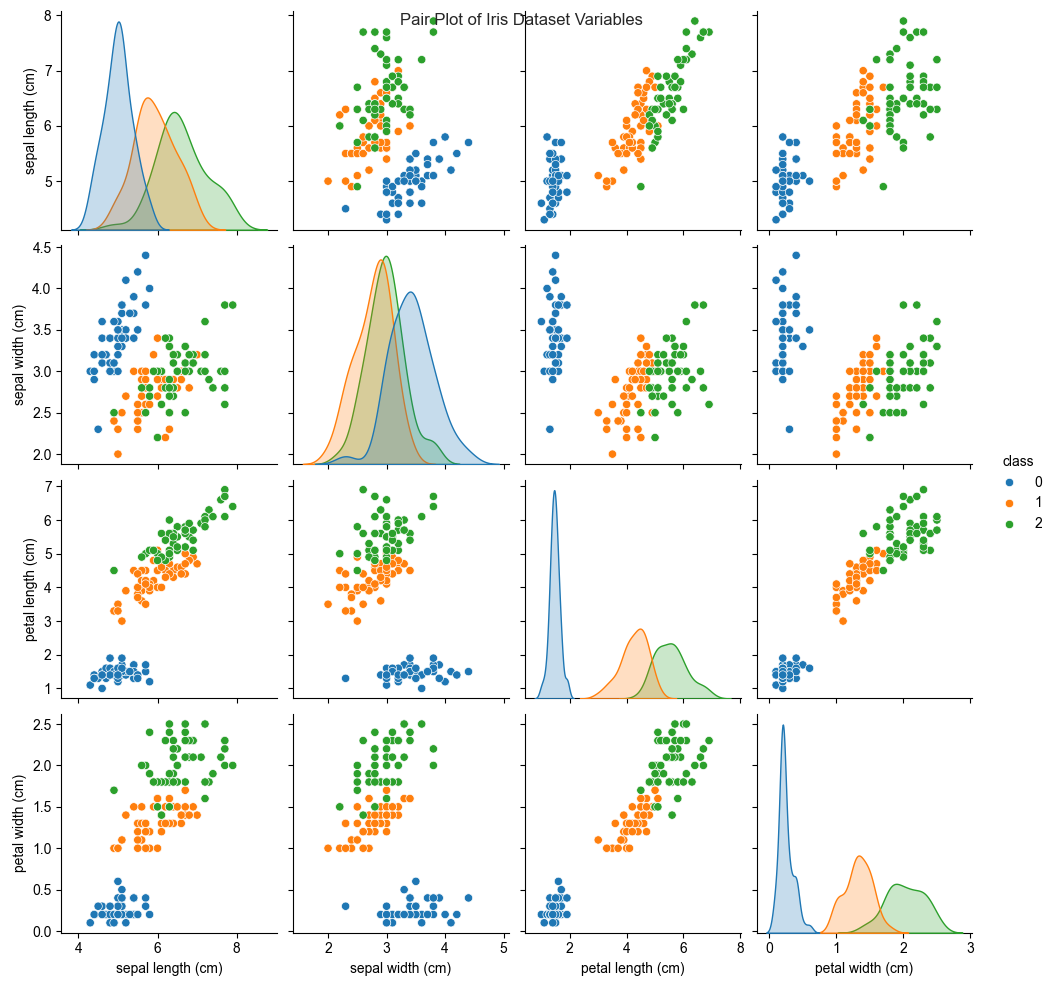

In [24]:
#create a pair plot
sns.pairplot(df,hue='class', palette='tab10')
sns.set_style("whitegrid")
plt.suptitle("Pair Plot of Iris Dataset Variables")
plt.show()

In [25]:
# Select column names with float64 data type
col_name = df.select_dtypes("float64").columns
col_name 

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

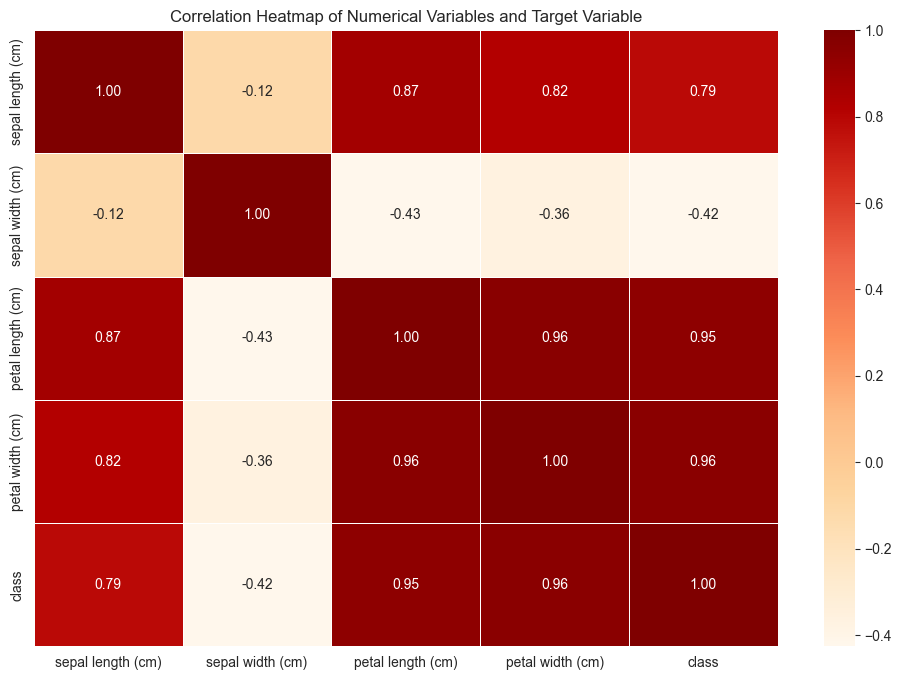

In [26]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='OrRd', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables and Target Variable')
plt.show()

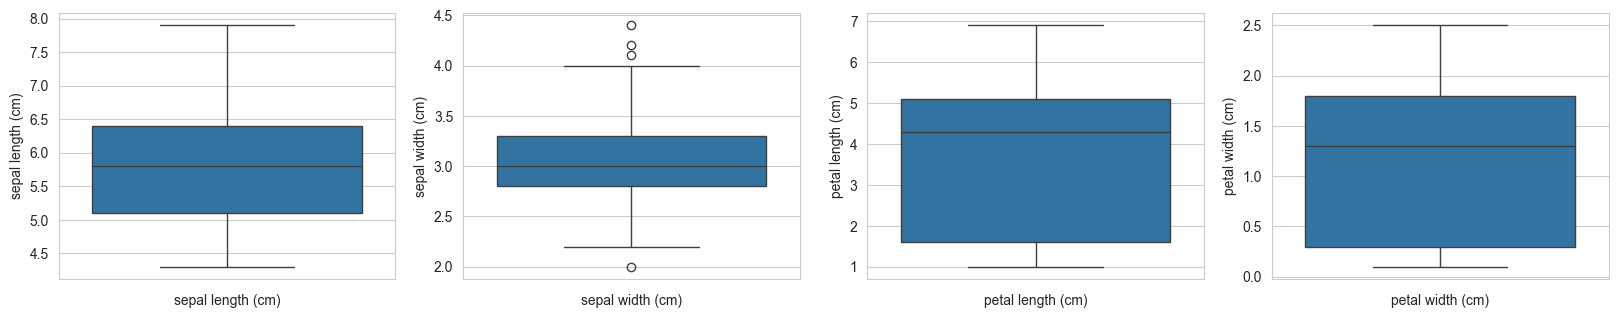

In [27]:
#providing distribution and spread of feature
fig = plt.figure(figsize=(20,20))
counter = 0

for col in col_name:
    fig.add_subplot(5,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

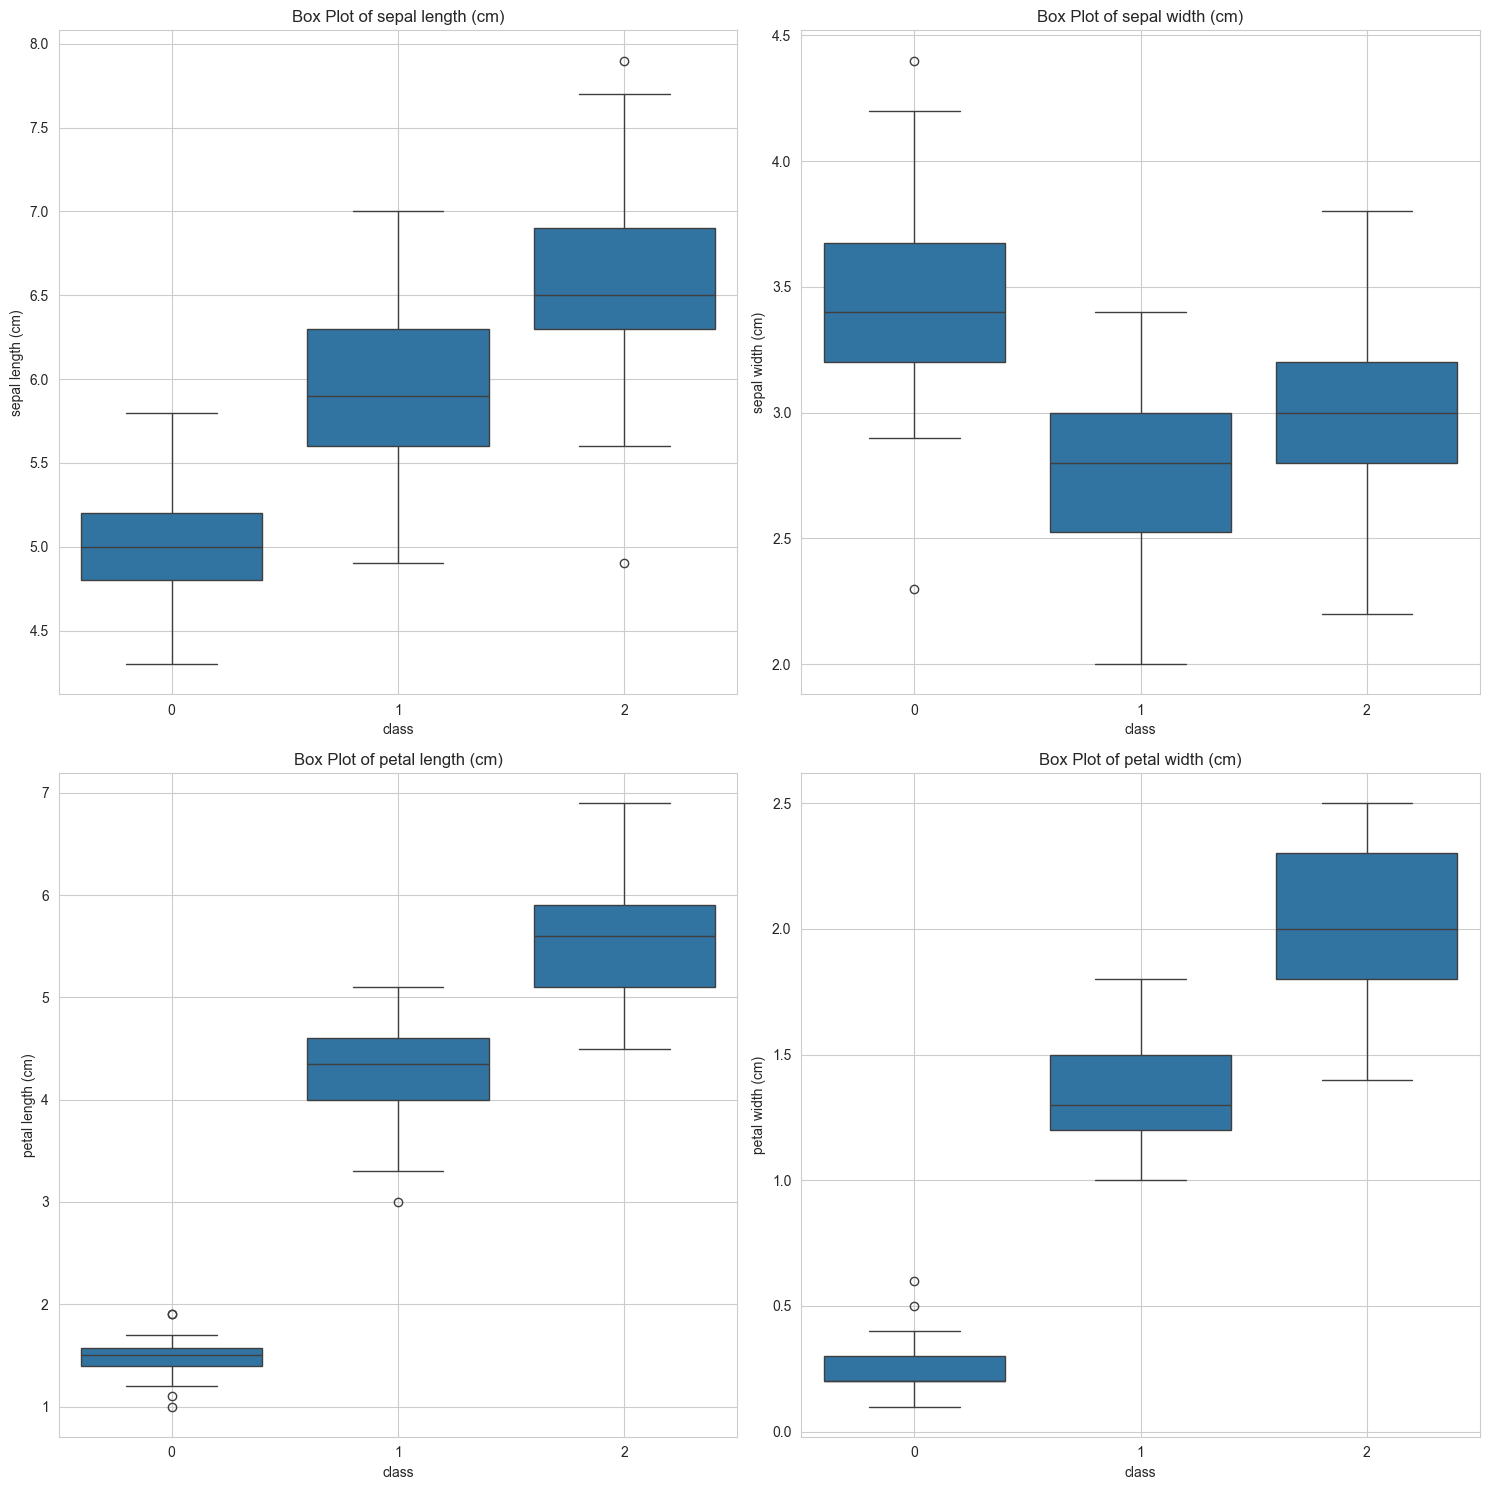

In [28]:
#creates a box plot for each feature
fig, axes = plt.subplots(2, 2, figsize=(15,15))
for i, col in enumerate(col_name):
    sns.boxplot(data=df, x='class', y=col, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Box Plot of {col}')
    axes[i // 2, i % 2].grid(True)
plt.tight_layout()
plt.show()

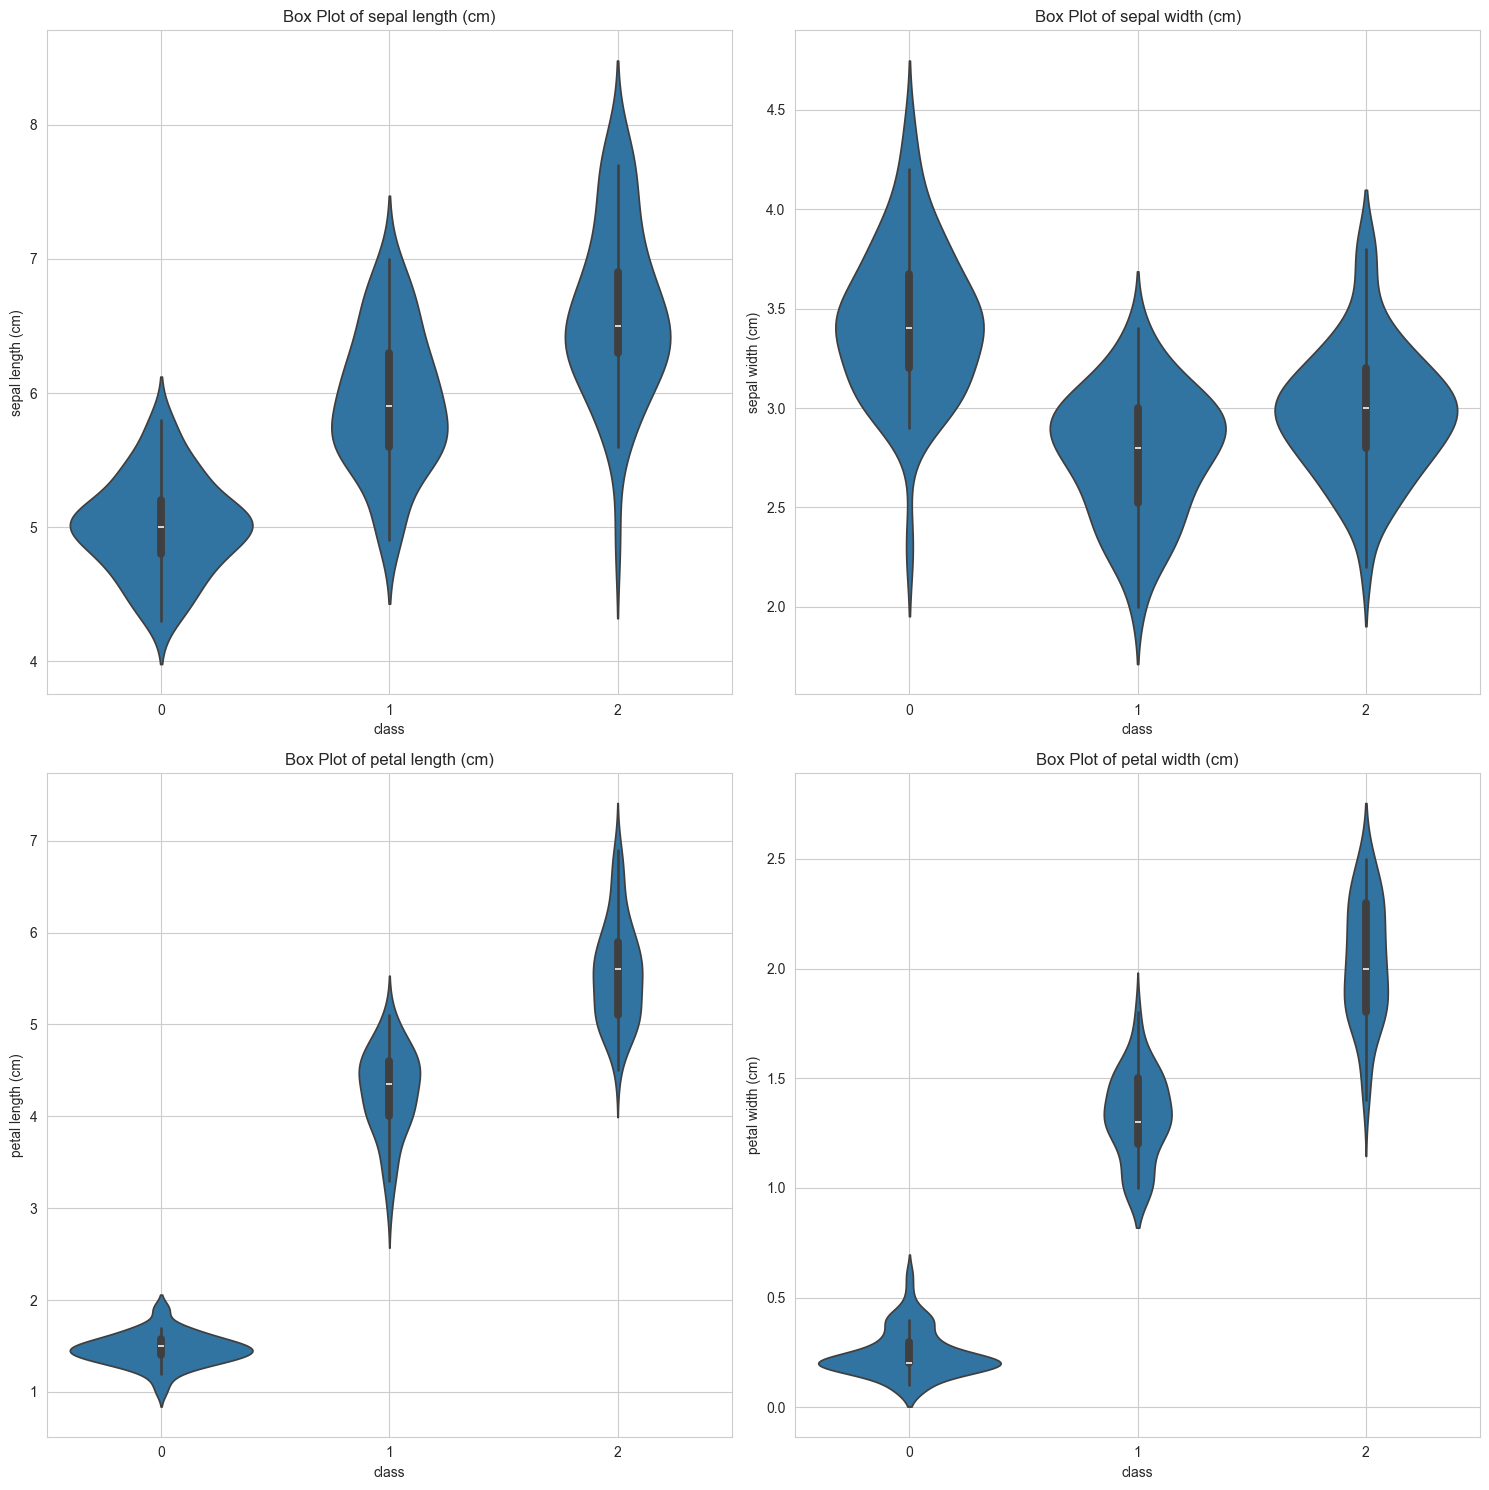

In [29]:
#creates a violin plot for each feature
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
for i, col in enumerate(col_name):
    sns.violinplot(data=df, x='class', y=col, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Box Plot of {col}')
    axes[i // 2, i % 2].grid(True)
plt.tight_layout()
plt.show()

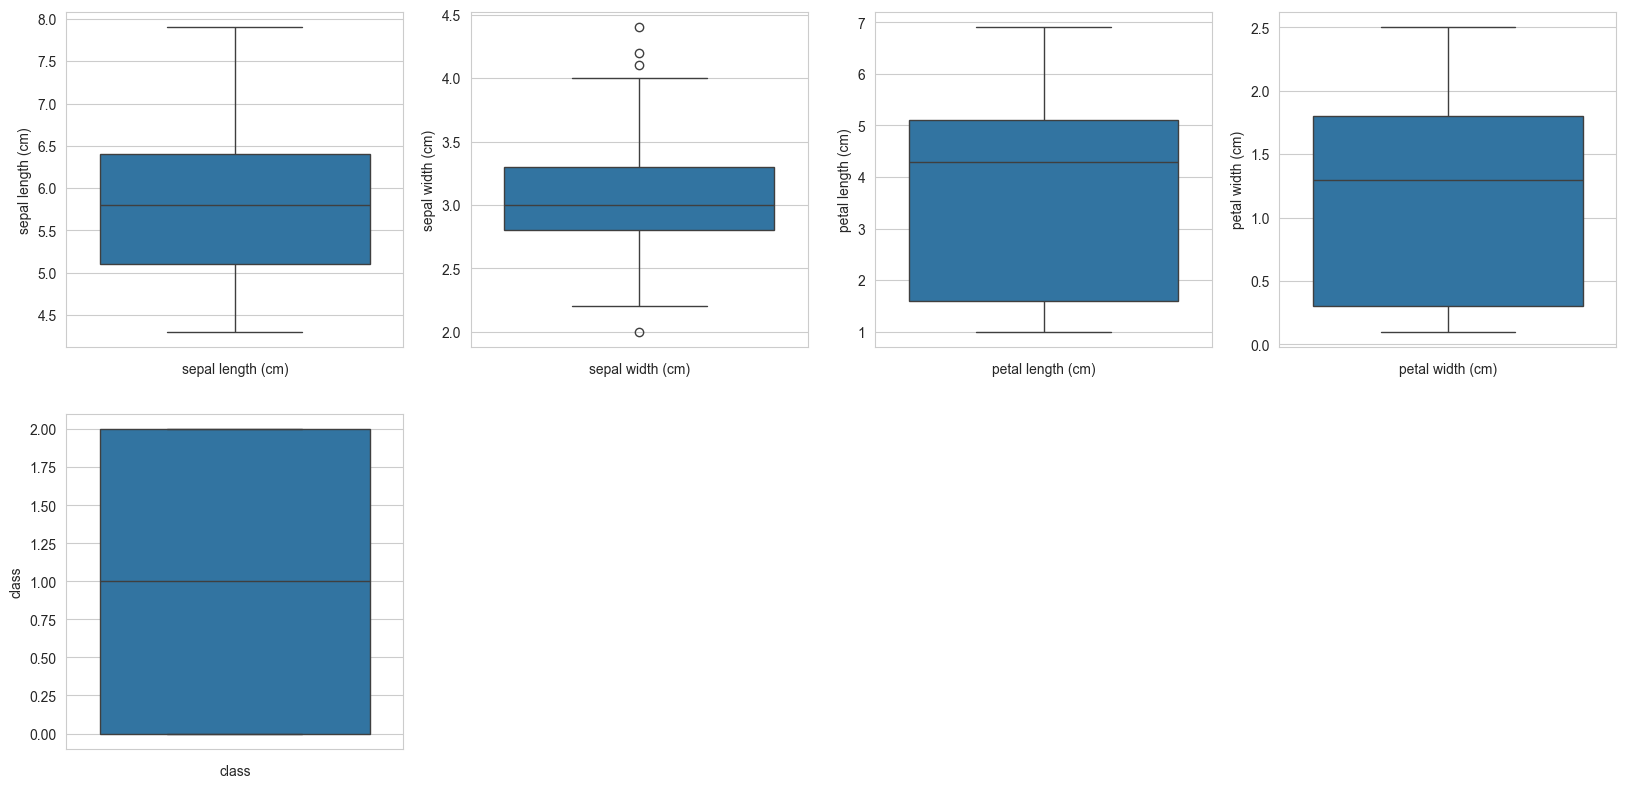

In [30]:
#box plot to identify outliers
fig = plt.figure(figsize=(20,20))
counter = 0

for col in df.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

In [31]:
def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [32]:
#removing outliers using capping
for i in df.select_dtypes(include="number").columns:
    lw,uw=whisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i]) 

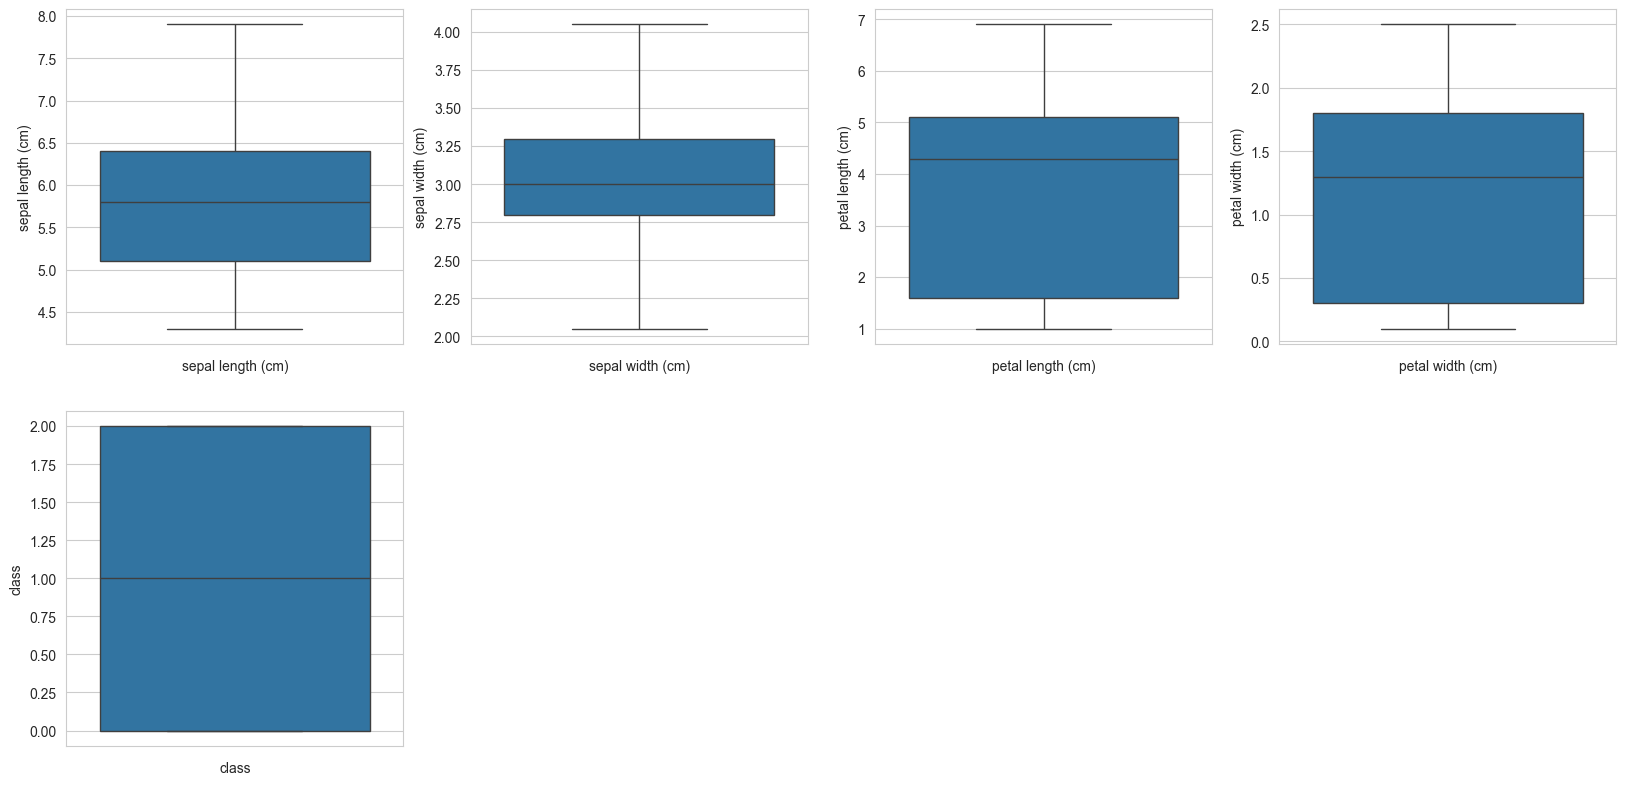

In [33]:
#box plot after outlier treatment
fig = plt.figure(figsize=(20,20))
counter = 0

for col in df.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

In [34]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2.0
145,6.3,2.5,5.0,1.9,2.0
146,6.5,3.0,5.2,2.0,2.0
147,6.2,3.4,5.4,2.3,2.0


In [35]:
#Feature Scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[col_name])

# Convert scaled data to DataFrame
scaled_df = pd.DataFrame(df_scaled, columns=col_name)

df[col_name] = scaled_df

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,0.222222,0.725,0.067797,0.041667,0.0
1,0.166667,0.475,0.067797,0.041667,0.0
2,0.111111,0.575,0.050847,0.041667,0.0
3,0.083333,0.525,0.084746,0.041667,0.0
4,0.194444,0.775,0.067797,0.041667,0.0
...,...,...,...,...,...
144,0.666667,0.475,0.711864,0.916667,2.0
145,0.555556,0.225,0.677966,0.750000,2.0
146,0.611111,0.475,0.711864,0.791667,2.0
147,0.527778,0.675,0.745763,0.916667,2.0


In [37]:
#Model Building

In [38]:
x=df.drop('class',axis=1)

In [39]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.725,0.067797,0.041667
1,0.166667,0.475,0.067797,0.041667
2,0.111111,0.575,0.050847,0.041667
3,0.083333,0.525,0.084746,0.041667
4,0.194444,0.775,0.067797,0.041667
...,...,...,...,...
144,0.666667,0.475,0.711864,0.916667
145,0.555556,0.225,0.677966,0.750000
146,0.611111,0.475,0.711864,0.791667
147,0.527778,0.675,0.745763,0.916667


In [40]:
#K-Means Clustering

In [41]:
#Using elobow plot 

In [42]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
    km = KMeans(i)
    km.fit(x)
    wcss.append(km.inertia_)
np.array(wcss)

array([42.82278937, 13.23831412,  7.84776214,  6.26671867,  5.7548784 ,
        4.52511164,  3.90274656,  3.60857926,  3.35310331])

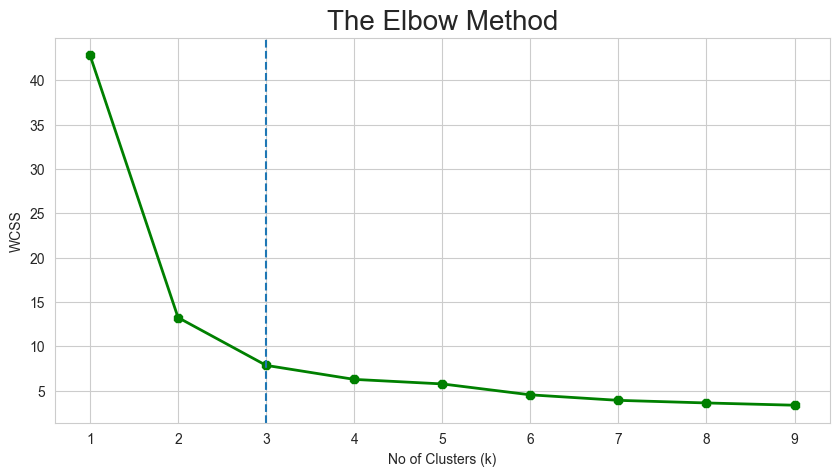

In [43]:
fig, ax = plt.subplots(figsize=(10,5))
ax = plt.plot(range(1,10),wcss,linewidth = 2, color = 'green',marker = '8')
plt.axvline(x=3,ls='--')
plt.ylabel('WCSS')
plt.xlabel('No of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

In [44]:
km=KMeans(n_clusters=3)
km.fit(x)

KMeans(n_clusters=3)

In [45]:
KMeans(n_clusters=3)

KMeans(n_clusters=3)

In [46]:
y_pred=km.predict(x)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2])

In [47]:
x['cluster']=y_pred
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,0.222222,0.725,0.067797,0.041667,1
1,0.166667,0.475,0.067797,0.041667,1
2,0.111111,0.575,0.050847,0.041667,1
3,0.083333,0.525,0.084746,0.041667,1
4,0.194444,0.775,0.067797,0.041667,1
...,...,...,...,...,...
144,0.666667,0.475,0.711864,0.916667,2
145,0.555556,0.225,0.677966,0.750000,0
146,0.611111,0.475,0.711864,0.791667,2
147,0.527778,0.675,0.745763,0.916667,2


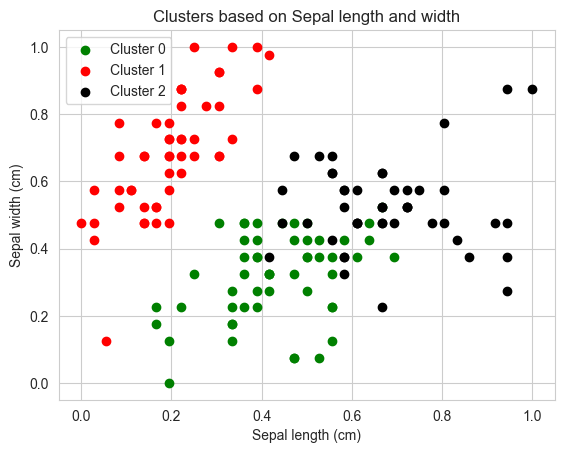

In [48]:
# Assuming 'cluster' is the column name containing cluster labels
df1 = x[x['cluster'] == 0]
df2 =x[x['cluster'] == 1]
df3 =x[x['cluster'] == 2]

plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='green', label='Cluster 0')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red', label='Cluster 1')
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], color='black', label='Cluster 2')

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Clusters based on Sepal length and width')
plt.legend()
plt.show()

In [49]:
#find out the centroids in each cluster
km.cluster_centers_

array([[0.43081761, 0.31603774, 0.56571794, 0.5322327 ],
       [0.19611111, 0.6835    , 0.07830508, 0.06083333],
       [0.67934783, 0.52282609, 0.77229182, 0.79800725]])

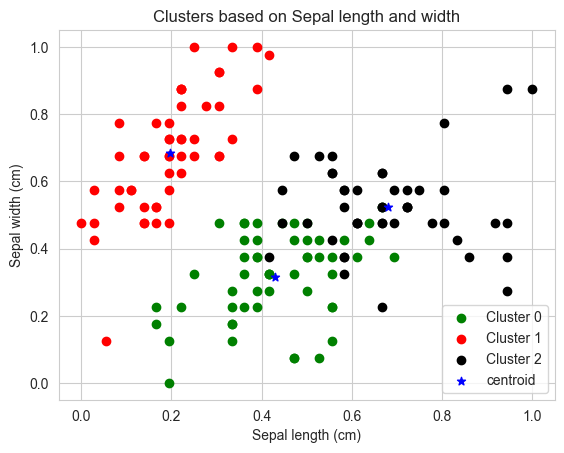

In [50]:
#scatter plot with centroids
df1 = x[x['cluster'] == 0]
df2 =x[x['cluster'] == 1]
df3 =x[x['cluster'] == 2]

plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='green', label='Cluster 0')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red', label='Cluster 1')
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], color='black', label='Cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='blue',marker='*',label='centroid')

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Clusters based on Sepal length and width')
plt.legend()
plt.show()

In [51]:
#Using Silhouette Analysis

In [52]:
from sklearn.metrics import silhouette_score
s= []
k_rng=range(2,11)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km_pred=km.fit_predict(x)
    s.append(silhouette_score(x, km_pred))

s

[0.630951195469214,
 0.786890075149965,
 0.6308229460792096,
 0.501494353659783,
 0.4790319754094674,
 0.34815522955847744,
 0.4707388763180611,
 0.3645408379157972,
 0.2876648449251667]

Text(0.5, 1.0, 'Silhouette Score vs. Number of Clusters')

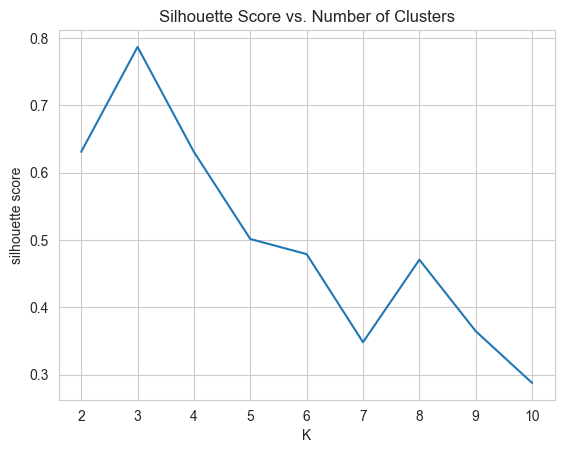

In [53]:
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.plot(k_rng,s)
plt.title('Silhouette Score vs. Number of Clusters')

In [54]:

optimalkmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 4)
y_kmeansbest= optimalkmeans.fit_predict(x)

In [55]:
silhouette_score_kmeans=silhouette_score(x, y_kmeansbest)
silhouette_score_kmeans

0.786890075149965

In [56]:
#Hierarchical Clustering

In [57]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

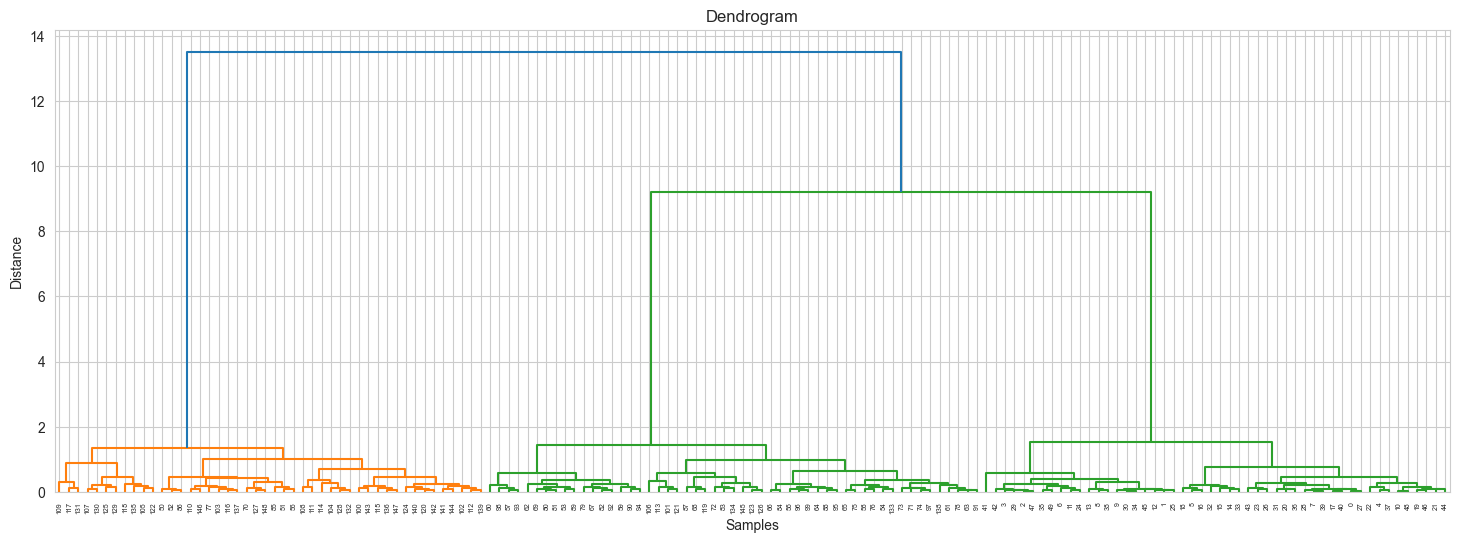

In [58]:
# Dendrogram plot
plt.figure(figsize=(18, 6))
# Calculate linkage using Ward's method and create the dendrogram
dendro = shc.dendrogram(shc.linkage(x, method="ward"))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [59]:
# Using Dendrogram.

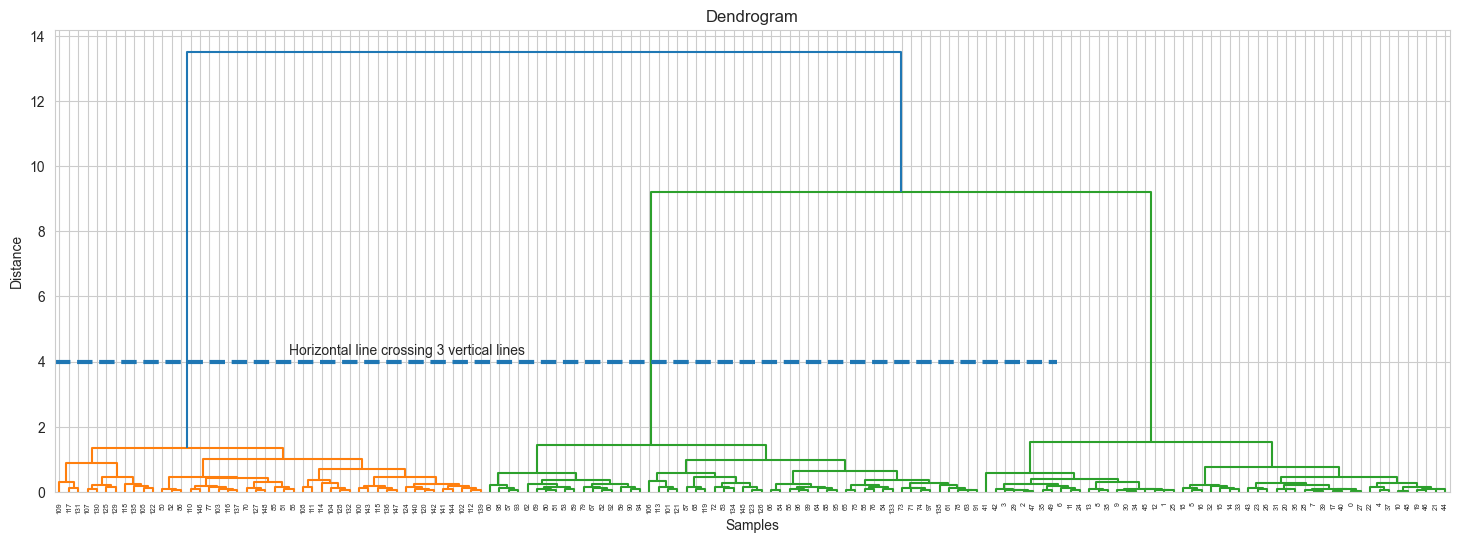

In [60]:
plt.figure(figsize=(18, 6))
dendro = shc.dendrogram(shc.linkage(x, method="ward"))
plt.hlines(y=4,xmin=0,xmax=1070,lw=3,linestyles='--')
plt.text(x=250,y=4.2,s='Horizontal line crossing 3 vertical lines')
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [61]:
#build the model
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
hc_pred = hc.fit_predict(x)
hc_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1], dtype=int64)

In [62]:
x['cluster']=hc_pred
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,0.222222,0.725,0.067797,0.041667,0
1,0.166667,0.475,0.067797,0.041667,0
2,0.111111,0.575,0.050847,0.041667,0
3,0.083333,0.525,0.084746,0.041667,0
4,0.194444,0.775,0.067797,0.041667,0


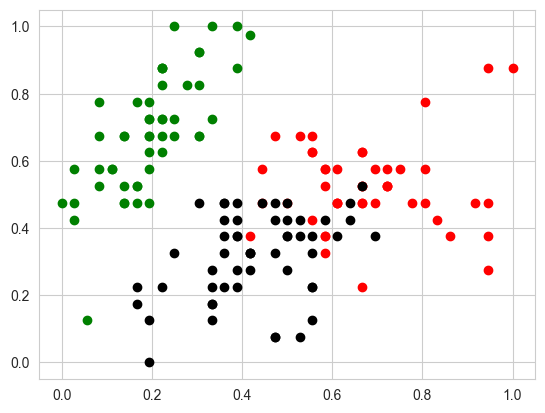

In [63]:
# Assuming 'cluster' is the column name containing cluster labels
df1 = x[x['cluster'] == 0]
df2 =x[x['cluster'] == 1]
df3 =x[x['cluster'] == 2]

plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='green', label='Cluster 0')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red', label='Cluster 1')
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], color='black', label='Cluster 2')

In [64]:
#Silhouette Analysis

In [65]:
sa=[]
k_rng=range(2,11)

for k in k_rng:
    hc=AgglomerativeClustering(n_clusters=k)
    hc_pred=hc.fit_predict(x)
    sa.append(silhouette_score(x, hc_pred))
sa

[0.6844910851634319,
 0.7623760538456276,
 0.627189565671288,
 0.47454060936982634,
 0.36329951809181804,
 0.3427293166408668,
 0.3424965702217855,
 0.35828122140352964,
 0.33932438925460784]

Text(0.5, 1.0, 'Silhouette Score vs. Number of Clusters')

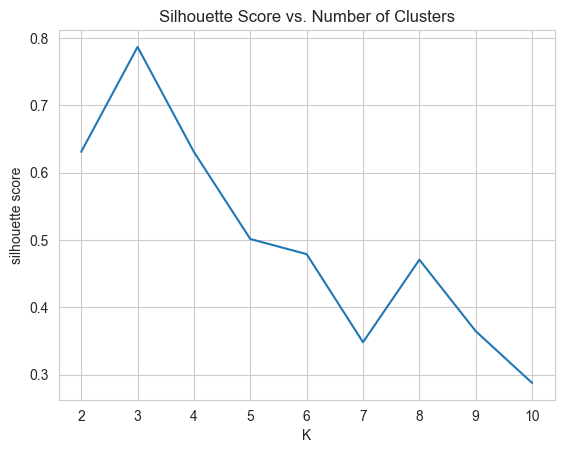

In [66]:
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.plot(k_rng,s)
plt.title('Silhouette Score vs. Number of Clusters')